# Modulation Classification Neural Network
### (Incomplete)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Input, Conv1D, ReLU, BatchNormalization, Add, AveragePooling1D, Flatten, Dense, MaxPooling1D
# from keras.layers.core import Activation, Flatten, Dense, Dropout
import keras
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import komm
import commpy

## Data Collection and Modulation Types

In [3]:
types = ['BPSK', 'QPSK', '8PSK', '16QAM', '64QAM', 
         'PAM4','GFSK', 'CPFSK', 'BFM', 'DSBAM', 'SSBAM']
# types = ['BPSK']

In [4]:
def data_collection(types=None, frames=1024):
    
    sig = []
    
    for i in types:
        
        if i == 'BPSK':
            psk = commpy.modulation.PSKModem(2)
            x_symbols = psk.modulate(np.random.randint(0, 2, frames))
            sig.append(x_symbols)
        
        elif i == 'QPSK':
            psk = commpy.modulation.PSKModem(4)
            x_symbols = psk.modulate(np.random.randint(0, 2, frames*2))
            sig.append(x_symbols)
            
        elif i == '8PSK':
            psk = commpy.modulation.PSKModem(8)
            x_symbols = psk.modulate(np.random.randint(0, 2, frames*3))
            sig.append(x_symbols)
            
        elif i == '16QAM':
            continue
            qam = commpy.modulation.QAMModem(16)
            x_symbols = qam.modulate(np.random.randint(0, 2, frames))
            sig.append(x_symbols)
            
        elif i == '64QAM':
            continue
            qam = commpy.modulation.QAMModem(64)
            x_symbols = qam.modulate(np.random.randint(0, 2, frames))
            sig.append(x_symbols)
            
        elif i == 'PAM4':
            pass
        
        elif i == 'GFSK':
            pass
        
        elif i == 'CPFSK':
            pass
        
        elif i == 'BFM':
            pass
        
        elif i == 'DSBAM':
            pass
        
        elif i == 'SSBAM':
            pass
        
    return sig

In [5]:
frames = 1024
x = range(0,1024)
signals = data_collection(types, frames)
print(len(signals))
print(len(signals[0]), '\t',len(signals[1]), '\t',len(signals[2]))

3
1024 	 1024 	 1024


1024 	
1024 	
1024 	


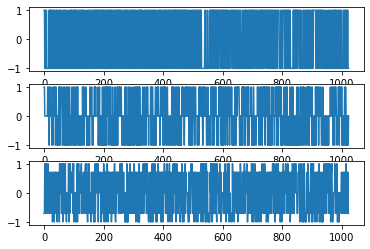

In [6]:
fig, ax = plt.subplots(len(signals))
# ax.plot(x[:], signals[0])
i = 0
for sig in signals:
    ax[i].plot(range(0,len(sig)), sig)

    i+=1
    print(len(sig),'\t')
    
plt.rcParams["figure.figsize"] = (35,30)
fig.savefig('test.png', dpi=100)


In [7]:
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## Preprocessing Data

In [8]:
processed_signals = []
for sig in signals:
    output = commpy.channels.awgn(sig, 30) # AWGN with 30dB noise
#     rician = commpy.channels.SISOFlatChannel(1, (0,1))
#     output = rician.propagate(output)
    processed_signals.append(output)

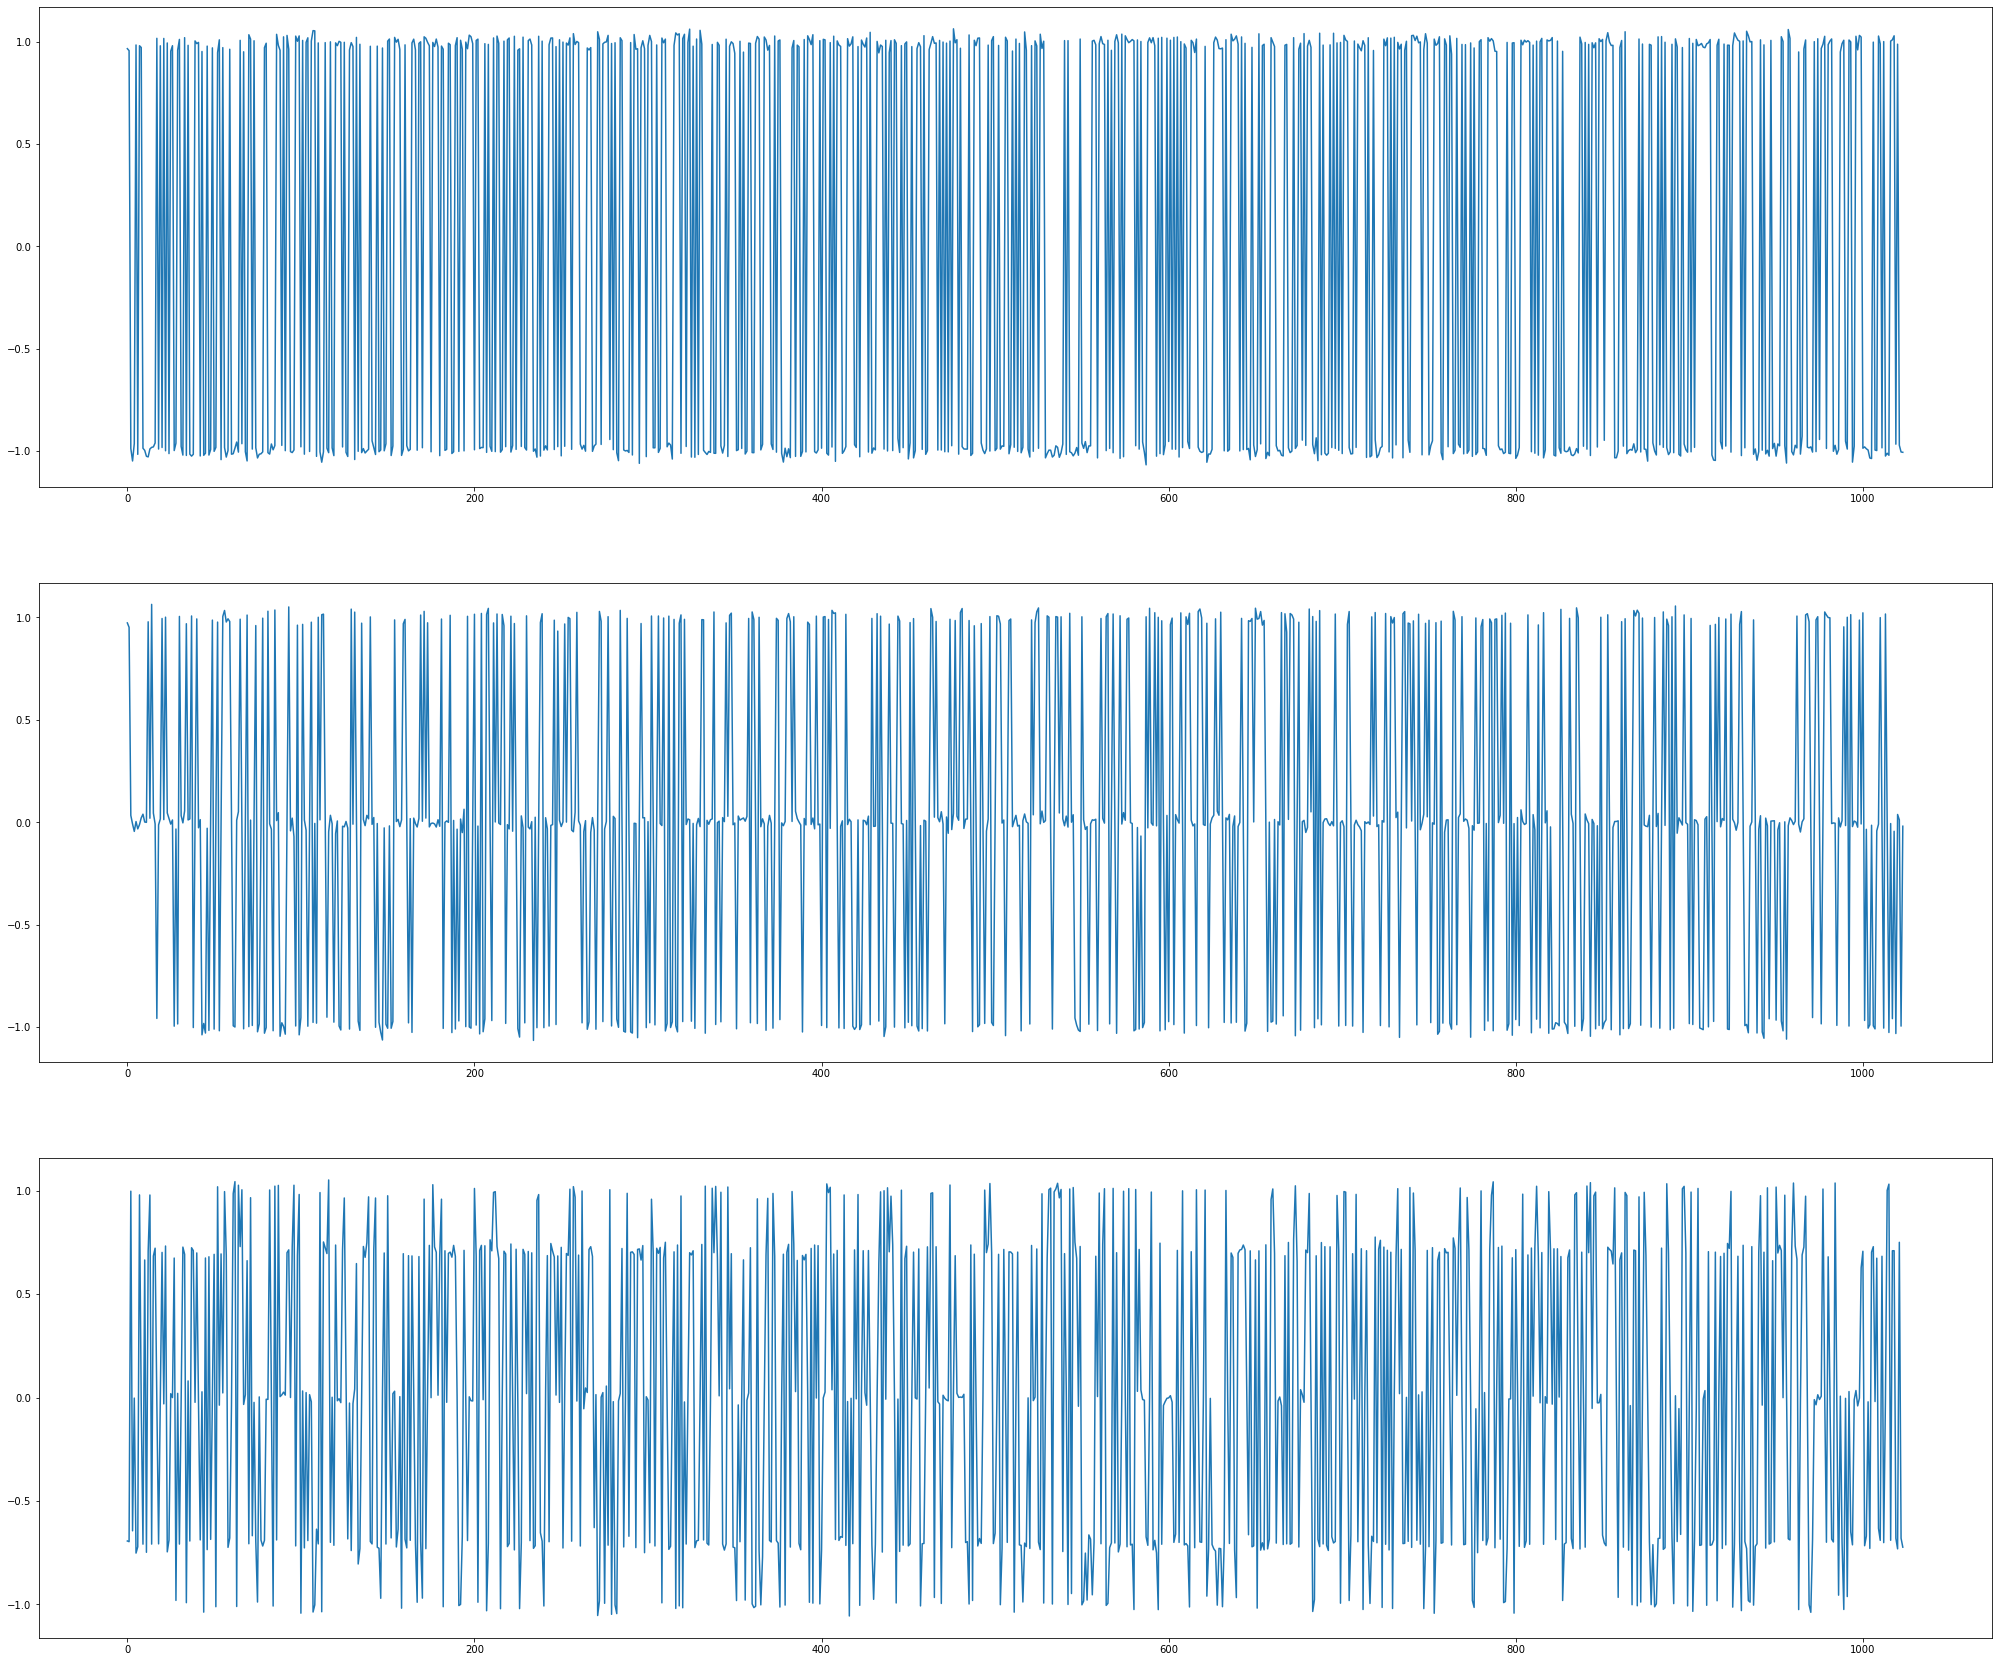

In [9]:
fig, ax = plt.subplots(len(processed_signals))
# ax.plot(x[:], signals[0])
i = 0
for sig in processed_signals:
    ax[i].plot(range(0,len(sig)), sig)
    i+=1
    
plt.rcParams["figure.figsize"] = (35,30)
fig.savefig('test_2.png', dpi=100)

## Model Development

In [10]:
def cnn(input_dim, labels):
    '''
    Base CNN model following MATLAB example:
    https://www.mathworks.com/help/comm/ug/modulation-classification-with-deep-learning.html
    
    '''
    x_input = Input(shape=input_dim)
    
    x = Conv1D(32, 2, padding='same')(x_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(32, 2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(32, 2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, 2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, 2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    
    x = Conv1D(64, 2, padding='same')(x)
    x = AveragePooling1D()(x)
    x = Flatten()(x)

    output = Dense(labels, activation='softmax')(x)
    
    model = tf.keras.models.Model(x_input, output)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model